# Eigen vector clustering

(a) Briefly explain your items and graph. 

(b) Plot the graph, by computer or by hand (in case this is easily possible; in the Class 9 slides, only edges between different groups are plotted for clarity). 

(c) Set up the symmetric Laplacian matrix L (Lij = −1 when there is an edge connect- ing node i with node j, and Lii = the number of edges of vertex i). You do not have to give the matrix in the report. 

(d) Compute (using the computer) the Fiedler vector, the eigenvector corresponding to the second smallest eigenvalue. The smallest eigenvalue λ1 should be 0 (or, on your computer, due to rounding errors, very close to zero, such as 10−15 or −10−16), but the next-to-smallest eigenvalue λ2 should not be very small. If λ2 equals (say) 10−14, it means that the graph is probably disconnected. On the other hand, if λ2 is a large number (such as 25, depending on the size of L), you can just continue, but this means that the Fiedler clustering thinks this is a tricky problem to cluster. 

(e) Color the nodes corresponding to the sign of the Fiedler vector, and display the result. Is it as expected? Can you explain the result? 

(f ) For this last part, take another graph, with more, or fewer edges: If your first graph had only few edges, choose a second with more edges. If your first graph had many edges, choose a second with fewer edges. Give the Fiedler value (second smallest eigenvalue) in both cases, and compare the result of the clustering in both cases. Which Fiedler value is smaller: that for the graph with many or few edges? Which graph seems easier to partition: the graph with many or few edges? Do you see a relation?

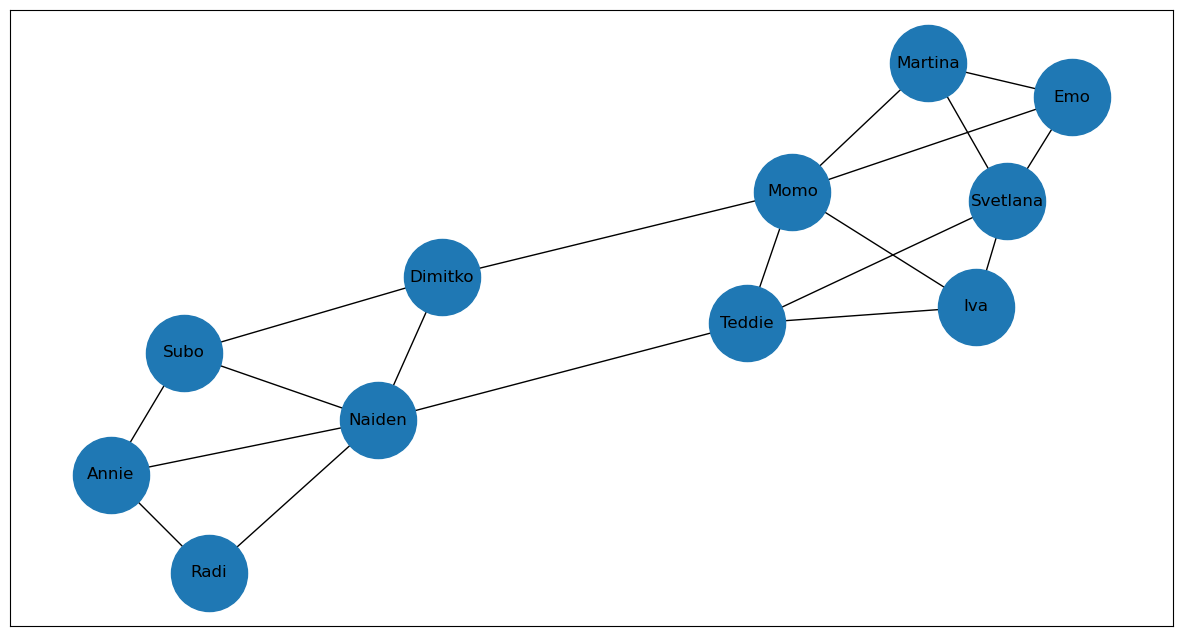

In [70]:
import networkx as nx 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy.linalg  

class GraphVisualization: 
    def __init__(self): 
        self.visual = [] 
          
    def addEdge(self, a, b): 
        temp = [a, b] 
        self.visual.append(temp) 
          
    def convertToGraph(self): 
        G = nx.Graph() 
        G.add_edges_from(self.visual) 
        return G
        
    def visualize(self, G):
        fig = plt.figure(1, figsize=(15, 8))
        nx.draw_networkx(G, node_size=3000)
        plt.show() 

G = GraphVisualization() 
G.addEdge('Svetlana', 'Emo')
G.addEdge('Svetlana', 'Iva')
G.addEdge('Svetlana', 'Teddie')
G.addEdge('Svetlana', 'Martina')
G.addEdge('Emo', 'Martina')
G.addEdge('Emo', 'Momo')
G.addEdge('Martina', 'Momo')
G.addEdge('Momo', 'Iva')
G.addEdge('Momo', 'Dimitko')


G.addEdge('Iva', 'Teddie')
G.addEdge('Momo', 'Teddie')
G.addEdge('Teddie', 'Naiden')
G.addEdge('Naiden', 'Dimitko')
G.addEdge('Naiden', 'Annie')
G.addEdge('Naiden', 'Radi')
G.addEdge('Naiden', 'Subo')
G.addEdge('Dimitko', 'Subo')
G.addEdge('Annie', 'Subo')
G.addEdge('Annie', 'Radi')

G.visualize(G.convertToGraph())

## Laplacian matrix

In [78]:
L = nx.laplacian_matrix(G.convertToGraph()).toarray()

print('Eigen values:')
eigenValues = numpy.linalg.eigvals(L)
eigenValues = numpy.sort(eigenValues)
print(eigenValues)

indexes = [i for i in range(11)]
header = ['Svetla', 'Emo', 'Iva', 'Teddie', 'Marti', 'Momo', 'Dimi', 'Naiden', 'Ani', 'Radi', 'Subo']

Laplacian = pd.DataFrame(data=L, index=header, columns=header) 

print(Laplacian)


Eigen values:
[3.55112460e-17 4.80400598e-01 1.89650410e+00 2.18923731e+00
 3.18037364e+00 4.00000000e+00 4.23640692e+00 4.34138535e+00
 4.78841233e+00 5.94349080e+00 6.94378897e+00]
        Svetla  Emo  Iva  Teddie  Marti  Momo  Dimi  Naiden  Ani  Radi  Subo
Svetla       4   -1   -1      -1     -1     0     0       0    0     0     0
Emo         -1    3    0       0     -1    -1     0       0    0     0     0
Iva         -1    0    3      -1      0    -1     0       0    0     0     0
Teddie      -1    0   -1       4      0    -1     0      -1    0     0     0
Marti       -1   -1    0       0      3    -1     0       0    0     0     0
Momo         0   -1   -1      -1     -1     5    -1       0    0     0     0
Dimi         0    0    0       0      0    -1     3      -1    0     0    -1
Naiden       0    0    0      -1      0     0    -1       5   -1    -1    -1
Ani          0    0    0       0      0     0     0      -1    3    -1    -1
Radi         0    0    0       0      0     0  

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  import inspect


## Fiedler vector

In [69]:
fiedlerVector = nx.fiedler_vector(G.convertToGraph(), normalized=True, seed=1)

print('Fiedler vector:')
print(fiedlerVector)

Fiedler vector:
[-0.299006   -0.27447173 -0.21391938 -0.15451803 -0.27447173 -0.2378424
  0.19168177  0.3873764   0.42360491  0.34673078  0.35809216 -0.13792713]


## Clusters

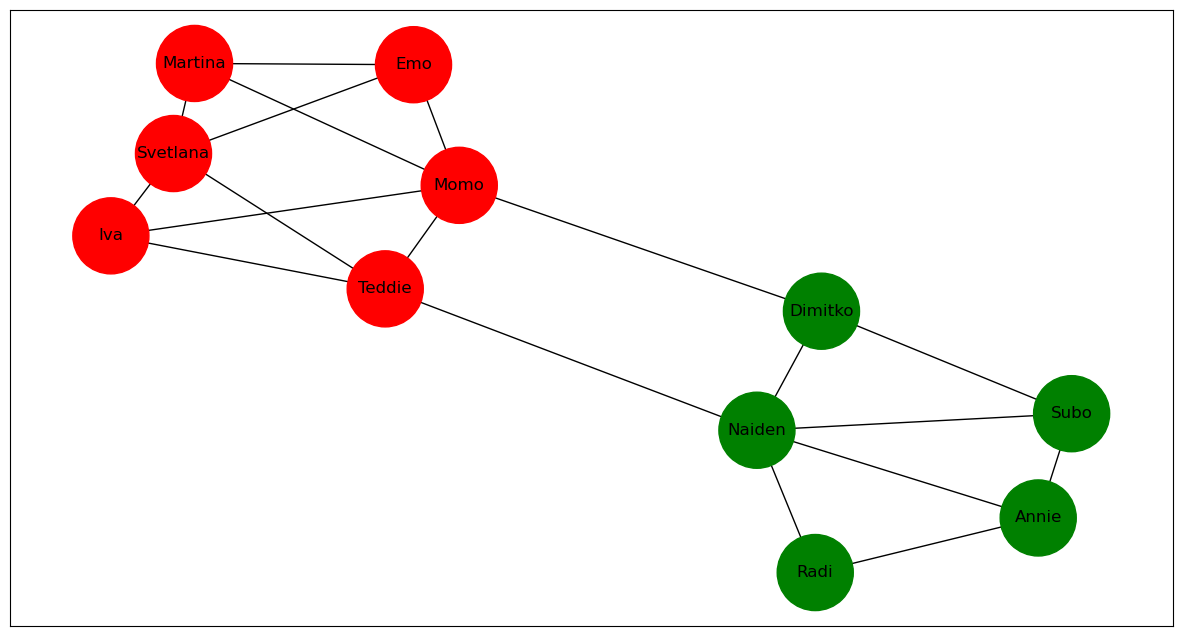

In [60]:
clusteredGraph = G.convertToGraph()

color_map = []
for node in fiedlerVector:
    if node < 0:
        color_map.append('red')
    else: 
        color_map.append('green')      

fig = plt.figure(1, figsize=(15, 8))
nx.draw_networkx(clusteredGraph, node_color=color_map, with_labels=True, node_size=3000)
plt.show()


## Graph with more edges

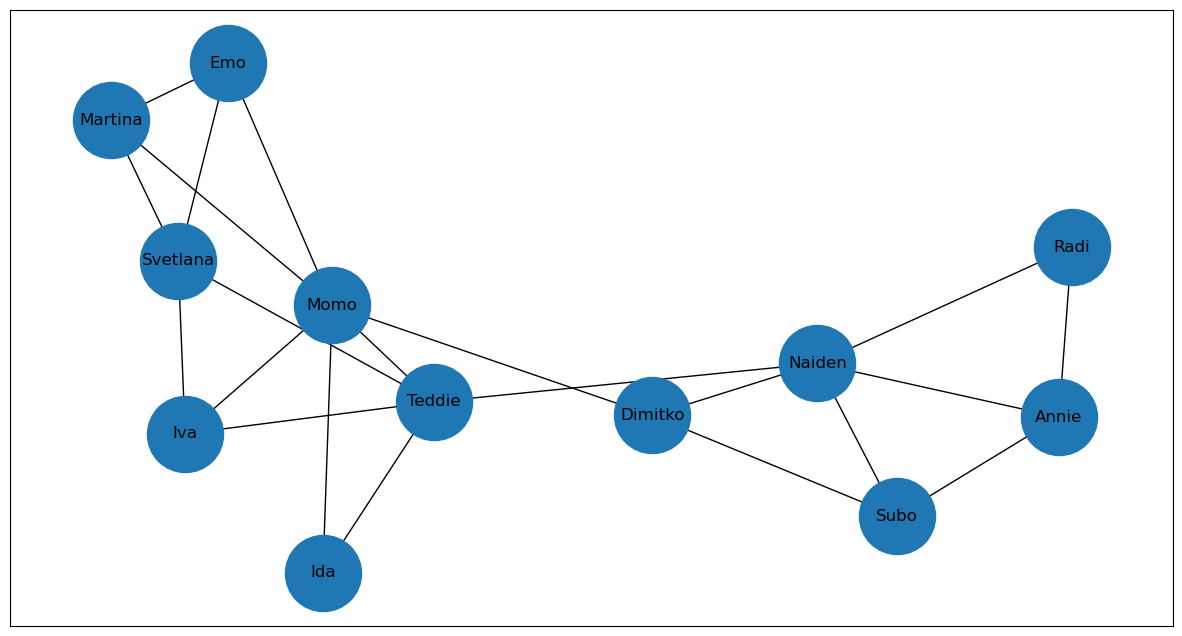

Eigen values:
[-1.54088556e-15  4.64290516e-01  1.63090953e+00  1.92955302e+00
  2.48350343e+00  3.23418756e+00  4.00000000e+00  4.42459675e+00
  4.62340857e+00  5.22015987e+00  6.39508050e+00  7.59431025e+00]
        Svetla  Emo  Iva  Teddie  Marti  Momo  Dimi  Naiden  Ani  Radi  Subo  \
Svetla       4   -1   -1      -1     -1     0     0       0    0     0     0   
Emo         -1    3    0       0     -1    -1     0       0    0     0     0   
Iva         -1    0    3      -1      0    -1     0       0    0     0     0   
Teddie      -1    0   -1       5      0    -1     0      -1    0     0     0   
Marti       -1   -1    0       0      3    -1     0       0    0     0     0   
Momo         0   -1   -1      -1     -1     6    -1       0    0     0     0   
Dimi         0    0    0       0      0    -1     3      -1    0     0    -1   
Naiden       0    0    0      -1      0     0    -1       5   -1    -1    -1   
Ani          0    0    0       0      0     0     0      -1    3    -1

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  import inspect


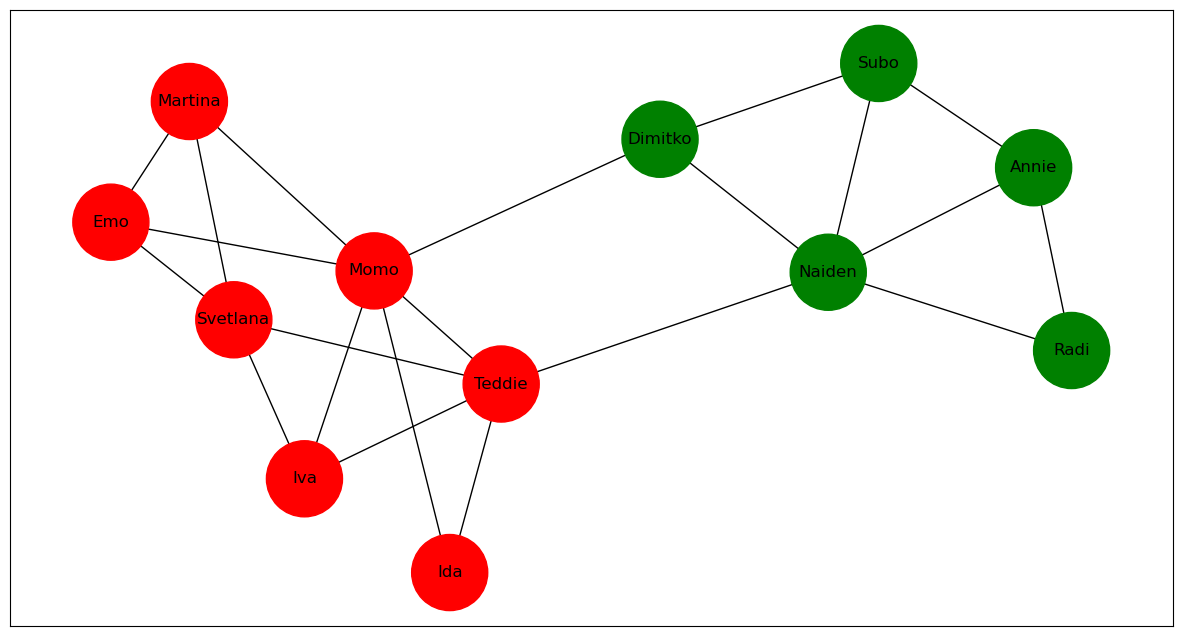

In [80]:
G2 = G
G2.addEdge('Teddie', 'Ida')
G2.addEdge('Momo', 'Ida')
G2.visualize(G2.convertToGraph())

L = nx.laplacian_matrix(G2.convertToGraph()).toarray()
print('Eigen values:')
eigenValues = numpy.linalg.eigvals(L)
eigenValues = numpy.sort(eigenValues)
print(eigenValues)

indexes = [i for i in range(11)]
header = ['Svetla', 'Emo', 'Iva', 'Teddie', 'Marti', 'Momo', 'Dimi', 'Naiden', 'Ani', 'Radi', 'Subo', 'Ida']

Laplacian = pd.DataFrame(data=L, index=header, columns=header) 

print(Laplacian)

fiedlerVector = nx.fiedler_vector(G2.convertToGraph(), normalized=True, seed=1)

print(fiedlerVector)

clusteredGraph = G2.convertToGraph()

color_map = []
for node in fiedlerVector:
    if node < 0:
        color_map.append('red')
    else: 
        color_map.append('green')      

fig = plt.figure(1, figsize=(15, 8))
nx.draw_networkx(clusteredGraph, node_color=color_map, with_labels=True, node_size=3000)
plt.show()

## Graph with less edges

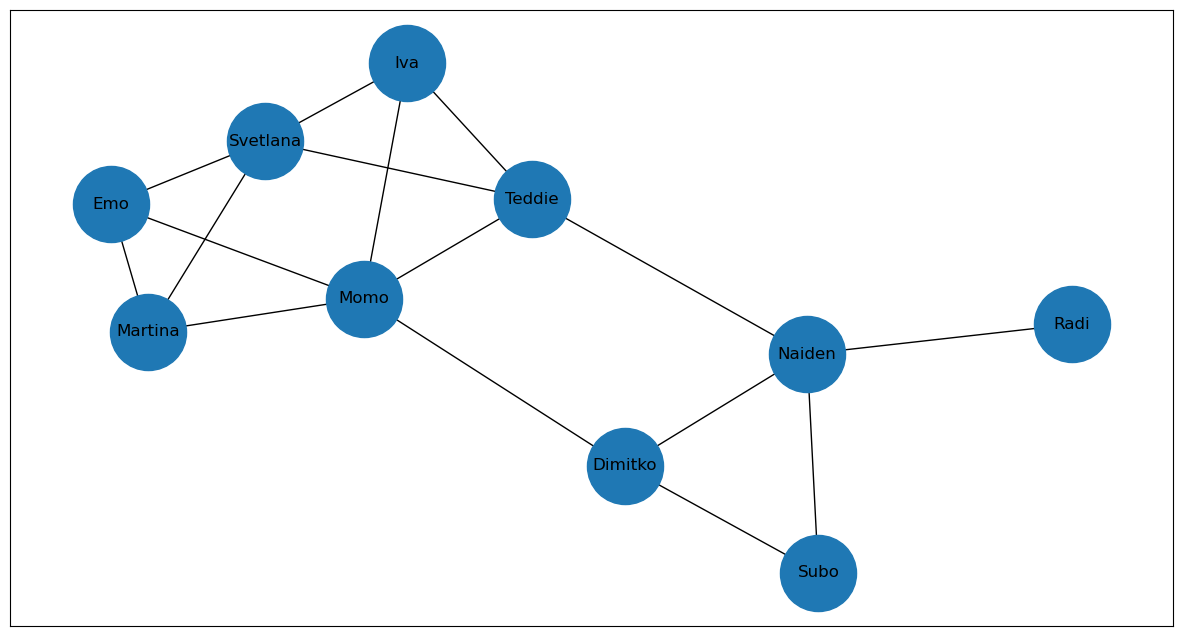

Eigen values:
[5.61086582e-16 5.35015422e-01 1.16291698e+00 2.17452722e+00
 3.30410961e+00 4.00000000e+00 4.00000000e+00 4.68855158e+00
 5.32396419e+00 6.81091499e+00]
        Svetla  Emo  Iva  Teddie  Marti  Momo  Dimi  Naiden  Radi  Subo
Svetla       4   -1   -1      -1     -1     0     0       0     0     0
Emo         -1    3    0       0     -1    -1     0       0     0     0
Iva         -1    0    3      -1      0    -1     0       0     0     0
Teddie      -1    0   -1       4      0    -1     0      -1     0     0
Marti       -1   -1    0       0      3    -1     0       0     0     0
Momo         0   -1   -1      -1     -1     5    -1       0     0     0
Dimi         0    0    0       0      0    -1     3      -1     0    -1
Naiden       0    0    0      -1      0     0    -1       4    -1    -1
Radi         0    0    0       0      0     0     0      -1     1     0
Subo         0    0    0       0      0     0    -1      -1     0     2
[-0.31602457 -0.30232113 -0.19517996 -0.

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  import inspect
<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  import inspect


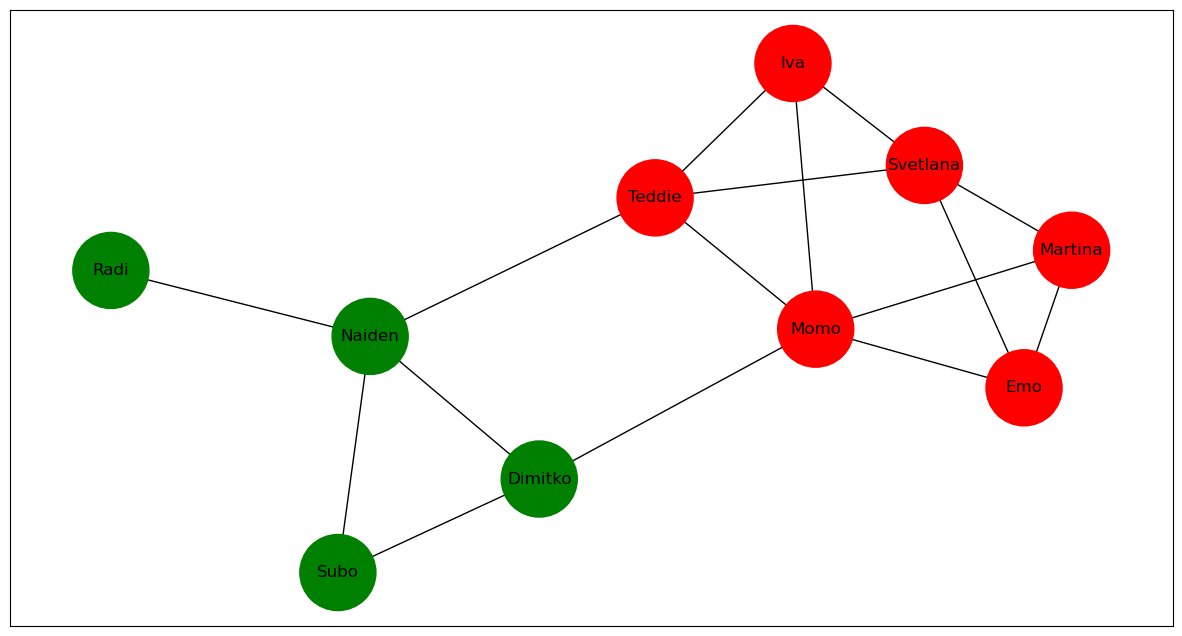

In [82]:

G3 = GraphVisualization() 
G3.addEdge('Svetlana', 'Emo')
G3.addEdge('Svetlana', 'Iva')
G3.addEdge('Svetlana', 'Teddie')
G3.addEdge('Svetlana', 'Martina')
G3.addEdge('Emo', 'Martina')
G3.addEdge('Emo', 'Momo')
G3.addEdge('Martina', 'Momo')
G3.addEdge('Momo', 'Iva')
G3.addEdge('Momo', 'Dimitko')

G3.addEdge('Iva', 'Teddie')
G3.addEdge('Momo', 'Teddie')
G3.addEdge('Teddie', 'Naiden')
G3.addEdge('Naiden', 'Dimitko')
G3.addEdge('Naiden', 'Radi')
G3.addEdge('Naiden', 'Subo')
G3.addEdge('Dimitko', 'Subo')

G3.visualize(G3.convertToGraph())

L = nx.laplacian_matrix(G3.convertToGraph()).toarray()
print('Eigen values:')
eigenValues = numpy.linalg.eigvals(L)
eigenValues = numpy.sort(eigenValues)
print(eigenValues)

indexes = [i for i in range(11)]
header = ['Svetla', 'Emo', 'Iva', 'Teddie', 'Marti', 'Momo', 'Dimi', 'Naiden', 'Radi', 'Subo']

Laplacian = pd.DataFrame(data=L, index=header, columns=header) 

print(Laplacian)

fiedlerVector = nx.fiedler_vector(G3.convertToGraph(), normalized=True, seed=1)

print(fiedlerVector)

clusteredGraph = G3.convertToGraph()

color_map = []
for node in fiedlerVector:
    if node < 0:
        color_map.append('red')
    else: 
        color_map.append('green')      

fig = plt.figure(1, figsize=(15, 8))
nx.draw_networkx(clusteredGraph, node_color=color_map, with_labels=True, node_size=3000)
plt.show()